# **梅雨還是沒雨？**

安裝套件

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install joblib
!pip install sklearn
!pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import 套件

In [ ]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive

資料合併

In [ ]:
path_domestic = os.path.abspath(os.getcwd()) + '/data'
root = "/content/drive/MyDrive/1102/AI Machine learning/data"
data = glob.glob(os.path.join(root, "*.csv"))


df_1 = pd.concat((pd.read_csv(f) for f in data))

df_1.to_csv('./1_f.csv',encoding="utf_8_sig",index=False)

ValueError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


利用已取得的資料，讀取並存入讀取並存入data frame

In [ ]:
df = pd.read_csv("./1_f.csv")

Explore the data we have.

In [ ]:
df.info()
df.head()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 36 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                       --------------  -----  
 0   ObsTime	StnPres	SeaPres	StnPresMax	StnPresMaxTime	StnPresMin	StnPresMinTime	Temperature	T Max	T Max Time	T Min	T Min Time	Td dew point	RH	RHMin	RHMinTime	WS	WD	WSGust

,count,mean,std,min,25%,50%,75%,max
ObsTime,488.0,15.754098,8.815994,1.0,8.0,16.00,23.0,31.0
StnPres,488.0,984.998770,2.947633,973.8,983.3,985.35,987.0,993.3
Temperature,488.0,25.065369,2.730745,15.6,23.1,25.50,27.3,29.9
RH,488.0,79.391393,10.112940,37.0,73.0,79.00,86.0,100.0
WS,488.0,1.473770,0.912613,0.0,0.8,1.20,1.9,5.7
WD,488.0,142.192623,101.134122,0.0,35.0,204.00,226.0,360.0
Precp,488.0,8.785861,23.973179,0.0,0.0,0.00,5.5,312.0


由上看出有些資料我們並不需要，因此我們加以整理，因此移除我們覺得不需要的變數

In [ ]:
df.drop(['ObsTime', 'SeaPres', 'StnPresMaxTime', 'StnPresMinTime'], axis = 1, inplace = True)
df.drop(['T Max Time', 'T Min Time', 'Td dew point'], axis = 1, inplace = True)
df.drop(['RHMinTime', 'WGustTime'], axis = 1, inplace = True)
df.drop(['PrecpHour', 'PrecpMax10', 'PrecpMax10Time', 'PrecpMax60', 'PrecpMax60Time'], axis = 1, inplace = True)
df.drop(['SunShine', 'SunShineRate', 'GloblRad', 'VisbMean'], axis = 1, inplace = True)
df.drop(['EvapA', 'UVI Max', 'UVI Max Time', 'Cloud Amount'], axis = 1, inplace = True) 

再觀察一下我們的資料

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 14 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                       --------------  -----  
 0   ObsTime	StnPres	SeaPres	StnPresMax	StnPresMaxTime	StnPresMin	StnPresMinTime	Temperature	T Max	T Max Time	T Min	T Min Time	Td dew point	RH	RHMin	RHMinTime	WS	WD	WSGust

首先我們看到幾乎所有資料的型態都為object並且都沒有缺失值，因此我們要對此處理，結果發現轉換不了，有些原始資料的缺失值會以「...」的方式補齊，所以我們要先把「...」先替代掉，再把data type轉換成轉換成float。

In [ ]:
df.drop(['ObsTime'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
df = df.replace('...','-999.0')
df = df.replace('/','-999.0')
df = pd.DataFrame(df, dtype = np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: ignored

再觀察一下我們的資料

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 14 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                       --------------  -----  
 0   ObsTime	StnPres	SeaPres	StnPresMax	StnPresMaxTime	StnPresMin	StnPresMinTime	Temperature	T Max	T Max Time	T Min	T Min Time	Td dew point	RH	RHMin	RHMinTime	WS	WD	WSGust

我們先處理降雨量，因為有降水及代表有下雨，所以只要大於大於0就轉換為1，反之轉換為0。

In [ ]:
for k in range(854):
    if df.iloc[k,12] > 0.0:
        df.iloc[k,12] = 1
    else:
        df.iloc[k,12] = 0

有些資料我們打算用平均值來填補，並取到小數點後第一位

In [ ]:
count0, count1, count2, count3, count4, count5, count8 , count10 = 0, 0, 0, 0 ,0, 0, 0, 0
stnprestotal , stnpresmaxtotal , stnpresmintotal, WStotal , WSGusttotal, Ttotal , Tmaxtotal , Tmintotal = 0 , 0 , 0, 0 , 0, 0 , 0 , 0

for k in range(0,853):
    if (df.iloc[k,0] != -999.0):
        stnpres = float(df.iloc[k,0])
        count0 += 1
        stnprestotal += stnpres
    if (df.iloc[k,1] != -999.0):
        stnpresmax = float(df.iloc[k,1])
        count1 += 1
        stnpresmaxtotal += stnpresmax
    if (df.iloc[k,2] != -999.0):
        stnpresmin = float(df.iloc[k,2])
        count2 += 1
        stnpresmintotal += stnpresmin
    if (df.iloc[k,3] != -999.0):
        T = float(df.iloc[k,3])
        count3 += 1
        Ttotal += T
    if (df.iloc[k,4] != -999.0):
        Tmax = float(df.iloc[k,4])
        count4 += 1
        Tmaxtotal += Tmax
    if (df.iloc[k,5] != -999.0):
        Tmin = float(df.iloc[k,5])
        count5 += 1
        Tmintotal += Tmin
    if (df.iloc[k,8] != -999.0):
        WS = float(df.iloc[k,8])
        count8 += 1
        WStotal += WS
    if (df.iloc[k,10] != -999.0):
        WSGust = float(df.iloc[k,10])
        count10 += 1
        WSGusttotal += WSGust

ave0 = round(stnprestotal / count0 , 1)
ave1 = round(stnpresmaxtotal / count1 , 1)
ave2 = round(stnpresmintotal / count2 , 1)
ave3 = round(Ttotal / count3 , 1)
ave4 = round(Tmaxtotal / count4 , 1)
ave5 = round(Tmintotal / count5 , 1)
ave8 = round(WStotal / count8 , 1)
ave10 = round(WSGusttotal / count10 , 1)

for c in range(854):
    if df.iloc[c,0] == -999.0:
        df.iloc[c,0] = ave0
    if df.iloc[c,1] == -999.0:
        df.iloc[c,1] = ave1
    if df.iloc[c,2] == -999.0:
        df.iloc[c,2] = ave2
    if df.iloc[c,3] == -999.0:
        df.iloc[c,3] = ave3
    if df.iloc[c,4] == -999.0:
        df.iloc[c,4] = ave4
    if df.iloc[c,5] == -999.0:
        df.iloc[c,5] = ave5
    if df.iloc[c,8] == -999.0:
        df.iloc[c,8] = ave8
    if df.iloc[c,10] == -999.0:
        df.iloc[c,10] = ave10

剩下的資料我們以眾數的方式來填補缺失值

In [ ]:
for i in range(854):
    if df.iloc[i,6] == -999.0:
            df.iloc[i,6] = df['RH'].value_counts().idxmax()

for i in range(854):
    if df.iloc[i,7] == -999.0:
            df.iloc[i,7] = df['RHMin'].value_counts().idxmax()           

for i in range(854):
    if df.iloc[i,9] == -999.0:
            df.iloc[i,9] = df['WD'].value_counts().idxmax()

for i in range(854):
    if df.iloc[i,11] == -999.0:
            df.iloc[i,11] = df['WDGust'].value_counts().idxmax()

接著我們看看，每個各別資料對雨量的關係圖

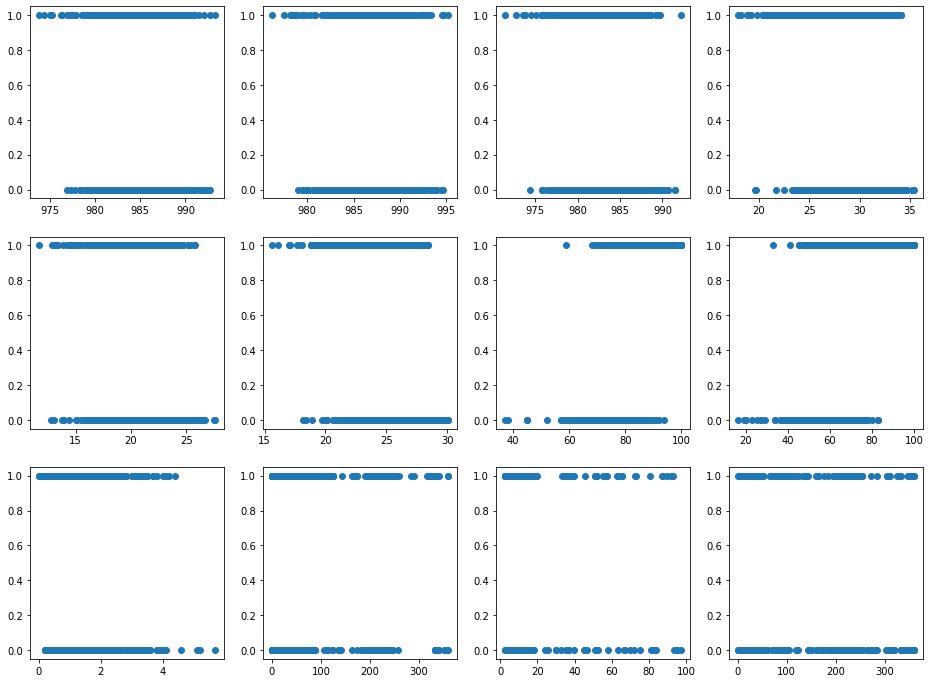

In [ ]:
x1 = df['StnPres']
x2 = df['StnPresMax']
x3 = df['StnPresMin']
x4 = df['T Max']
x5 = df['T Min']
x6 = df['Temperature']
x7 = df['RH']
x8 = df['RHMin']
x9 = df['WS']
x10 = df['WD']
x11 = df['WSGust']
x12 = df['WDGust']
y = df['Precp']

plt.figure(figsize=(16, 12))

plt.subplot(3, 4, 1)
plt.scatter(x1,y)
plt.subplot(3, 4, 2)
plt.scatter(x2,y)
plt.subplot(3, 4, 3)
plt.scatter(x3,y)
plt.subplot(3, 4, 4)
plt.scatter(x4,y)
plt.subplot(3, 4, 5)
plt.scatter(x5,y)
plt.subplot(3, 4, 6)
plt.scatter(x6,y)
plt.subplot(3, 4, 7)
plt.scatter(x7,y)
plt.subplot(3, 4, 8)
plt.scatter(x8,y)
plt.subplot(3, 4, 9)
plt.scatter(x9,y)
plt.subplot(3, 4, 10)
plt.scatter(x10,y)
plt.subplot(3, 4, 11)
plt.scatter(x11,y)
plt.subplot(3, 4, 12)
plt.scatter(x12,y)

plt.show()

接著我們看看，每個各別變數之間相關係數

In [ ]:
df.corr()

,StnPres,StnPresMax,StnPresMin,Temperature,T Max,T Min,RH,RHMin,WS,WD,WSGust,WDGust,Precp
StnPres,1.000000,0.973837,0.977780,-0.393330,-0.278551,-0.365425,-0.000452,0.002457,-0.095994,-0.205172,-0.129541,-0.191010,-0.102302
StnPresMax,0.973837,1.000000,0.942063,-0.401371,-0.286646,-0.389644,0.006529,0.006868,-0.063372,-0.182046,-0.106577,-0.185542,-0.068398
StnPresMin,0.977780,0.942063,1.000000,-0.360691,-0.258129,-0.332116,-0.012693,-0.009457,-0.107386,-0.194920,-0.130746,-0.188141,-0.114482
Temperature,-0.393330,-0.401371,-0.360691,1.000000,0.936330,0.800535,-0.429906,-0.462815,-0.133649,0.577173,0.086536,0.420318,-0.436195
T Max,-0.278551,-0.286646,-0.258129,0.936330,1.000000,0.691656,-0.521878,-0.640560,-0.128305,0.530669,0.103263,0.386274,-0.465951
T Min,-0.365425,-0.389644,-0.332116,0.800535,0.691656,1.000000,-0.152051,-0.159250,-0.102209,0.400518,0.094228,0.329499,-0.223502
RH,-0.000452,0.006529,-0.012693,-0.429906,-0.521878,-0.152051,1.000000,0.882385,-0.341775,-0.288269,-0.141324,-0.218402,0.635275
RHMin,0.002457,0.006868,-0.009457,-0.462815,-0.640560,-0.159250,0.882385,1.000000,-0.189154,-0.305214,-0.184937,-0.234054,0.534163
WS,-0.095994,-0.063372,-0.107386,-0.133649,-0.128305,-0.102209,-0.341775,-0.189154,1.000000,-0.053436,0.044637,-0.091865,-0.094960
WD,-0.205172,-0.182046,-0.194920,0.577173,0.530669,0.400518,-0.288269,-0.305214,-0.053436,1.000000,0.082668,0.422772,-0.255363


我們接著再把所有資料都餵給模型，來觀察模型辨識程度

In [ ]:
X = df.drop(['Precp'], axis=1)
y = df['Precp']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=67)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score(y_test, predictions)
recall_score(y_test, predictions)
precision_score(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7558139534883721

經過多次交叉測試後，發現什麼都沒有刪除，分數會最高

In [ ]:
X = df.drop(['Precp'], axis=1)
y = df['Precp']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=67)
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
accuracy_score(y_test, predictions)
recall_score(y_test, predictions)
precision_score(y_test, predictions)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7710843373493976

接著我們圖表化看出模型的矩陣關係


In [ ]:
pd.DataFrame(confusion_matrix(y_test, predictions), columns = ['Predict not rain','Predict rain'], index=['True not rain', 'True rain'])

,Predict not rain,Predict rain
True not rain,149,19
True rain,25,64


最後我們測試模型的辨認是否順利，然後有發現到測出來的型態為[1.]、[0.]

In [ ]:
print(lr.predict([[900, 1000, 850, 23, 27, 18, 34, 12, 1, 23, 2, 45]]))
print(lr.predict([[900, 860, 950 , 26, 31, 20, 70 , 50 , 3 , 20 , 6 , 25 ]]))

[1.]
[0.]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


利用joblib模組將模型匯出

In [ ]:
import joblib
joblib.dump(lr,'Precipitation_Predict.pkl',compress=3)

['Precipitation_Predict.pkl']